# Descriptive questions

## Grouped Overview of Descriptive Questions

### 1. Business-Level Performance
- Business Performance Overview  
  *Table: corporate_profit_and_loss_summary*
- How do income and expenses trend over months across the fleet?  
  *Tables: financial_table (by month), vehicles*
- Which vehicle had the lowest profit overall during the six months?  
  *Tables: financial_table (by month), vehicles*

### 2. Vehicle-Level Performance and Costs
- What is the total income generated per vehicle type (ICE, Hybrid, EV), considering vehicle value and age?  
  *Tables: profit_per_vehicle, vehicle_driver_assignments, Vehicle*
- What is the distribution of vehicle values, ages, and maintenance costs across the fleet?  
  *Tables: vehicles, vehicle_driver_assignments, maintenance_events*
- Which vehicles rack up the most maintenance events or claim incidents?  
  *Tables: maintenance_events, insurance_claims, vehicle_driver_assignments*
- What are the average and total operating costs per vehicle type and claim type (maintenance, accident)?  
  *Tables: service_type, vehicles*
- How does vehicle utilization vary by vehicle type and age (e.g., miles driven, trips assigned)?  
  *Tables: vehicle_driver_assignments, trip logs*
- What is the breakdown of claim incidents by vehicle type and age?  
  *Tables: service_type, vehicles*
- What is the average downtime per vehicle due to maintenance or repairs?  
  *Tables: maintenance_events, vehicle_driver_assignments*

### 3. Driver-Level Insights
- Which drivers are linked to the highest total accident-related costs?  
  *Tables: service_type (claim_type == 'Accident'), vehicle_driver_assignments, drivers_data*
- Which drivers are involved in the most accident events (regardless of cost)?  
  *Tables: service_type (claim_type == 'Accident'), vehicle_driver_assignments, drivers_data*








## Content 

0. Business Performance Overview
* Relevant table: corporate_profit_and_loss_summary

1.	What is the total income generated per vehicle type (ICE, Hybrid, EV), considering vehicle value and age?
 * Relevant tables: profit_per_vehicle table, vehicle_driver_assignments table, Vehicle table

2.	What is the distribution of vehicle values, ages, and maintenance costs across the fleet?

* 	Relevant tables: vehicles, vehicle_driver_assignments, maintenance_events
3.	Which vehicles rack up the most maintenance events or claim incidents?
*	Relevant tables: maintenance_events, insurance_claims, vehicle_driver_assignments

4. What are the average and total operating costs per vehicle type and claim type  ( maintenance, accident)?
* Relevant tables: service_type, vehicles

5. How does vehicle utilization vary by vehicle type and age (e.g., miles driven, trips assigned)?
* Relevant tables: vehicle_driver_assignments, trip logs

6. What is the breakdown of claim incidents by vehicle type and age?
* Relevant tables: service_type, vehicles

7. What is the average downtime per vehicle due to maintenance or repairs?
* Relevant tables: maintenance_events, vehicle_driver_assignments (to estimate impact on availability)

8. How do income and expenses trend over months across the fleet?
- 8.1 Which vehicle had the lowest profit overall during the six months?
* Relevant tables: financial_table (by month), vehicles


9. Which drivers are linked to the highest total accident-related costs?
* Relevant tables:service_type (filter by claim_type == 'Accident') vehicle_driver_assignmentsdrivers_data

10. Which drivers are involved in the most accident events (regardless of cost)?
* Relevant tables: service_type (claim_type == 'Accident'), vehicle_driver_assignments ,drivers_data



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
driver_data_df=pd.read_csv('../data/drivers_data.csv')
vehicle_driver_df = pd.read_csv("../data/vehicle_driver_assignment.csv")
profit_vehicles_df = pd.read_csv("../data/profit_per_vehicle.csv")
vehicle_profit_df= pd.read_csv('../data/profit_per_vehicle.csv')
vehicle_data_df = pd.read_csv("../data/vehicles_data.csv")
maintenance_cost = pd.read_csv("../data/material_usage_per_vehicle.csv")
service_type_df= pd.read_csv("../data/service_type.csv") 
trip_logs_df = pd.read_csv("../data/trip_logs.csv")

business_summary_df= pd.read_csv("../data/corporate_profit_and_loss_summary.csv")

## 0. Business Performance Overview

In [2]:
business_summary_df.head(6)

,Month,Total_Revenue,Total_Maintenance,Employee_Salary,Expenses,Profit_Before_Tax,Tax,Profit_After_Tax
0,2025-01,66011.0,6532.0,9416.67,28971.92,21090.41,4007.1779,17083.23
1,2025-02,41644.0,6389.0,9416.67,28971.92,-3133.59,-595.3821,-2538.21
2,2025-03,49522.0,7443.0,9416.67,28971.92,3690.41,701.1779,2989.23
3,2025-04,44064.0,5387.0,9416.67,28971.92,288.41,54.7979,233.61
4,2025-05,46609.0,9302.0,9416.67,28971.92,-1081.59,-205.5021,-876.09
5,2025-06,34333.0,5999.0,9416.67,28971.92,-10054.59,-1910.3721,-8144.22


The business is close to breaking even in the first half of 2025, with profits going up and down each month. After a strong January, profits dropped and we recorded losses in February, April and June.

We need to look into what is causing this, especially changes in revenue and rising maintenance costs, to understand what is going wrong and how to fix it.

In [338]:
profit_vehicles_df.columns

Index(['Month', 'vehicle_id', 'Vehicle_Income', 'Maintenance_Cost',
       'Profit_per_Vehicle'],
      dtype='object')

In [339]:
vehicle_data_df.columns

Index(['vehicle_id', 'make', 'model', 'year', 'type', 'mileage_start',
       'reg_plate', 'value'],
      dtype='object')

## 1. What is the total income generated per vehicle type (ICE, Hybrid, EV), considering vehicle value and age?

C:\Users\yeahm\AppData\Local\Temp\ipykernel_27920\1415328916.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_income, x='type', y='total_income', ci=None)


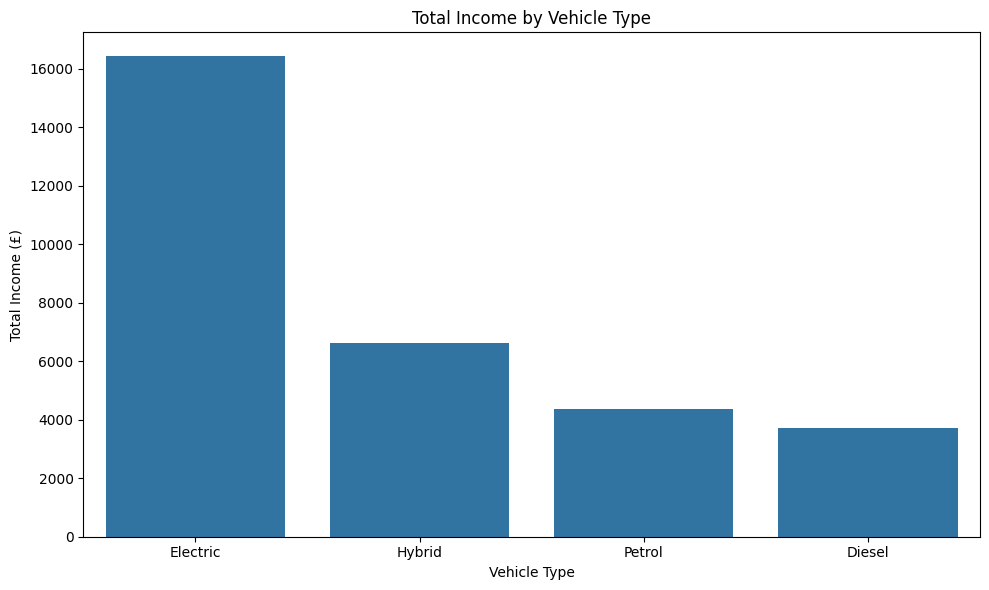

In [3]:
## select a.type,a.value, a.age, sum(b.profit_per_vehicle) as total_income from vehicla a 
# inner join   profit_vehicles b 
## on a.vehicle_id =b.vehilce_id 
## group by a,type,a.value,a.age

merge_df =pd.merge(vehicle_data_df,profit_vehicles_df,on='vehicle_id',how='left')

merge_df.head()

grouped_income= (
    merge_df
    .groupby(['type','value','year'])['Profit_per_Vehicle']
    .sum()
    .reset_index(name='total_income')
    .sort_values(by='year',ascending=False)
)


grouped_income.head(50)


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_income, x='type', y='total_income', ci=None)
plt.title("Total Income by Vehicle Type")
plt.ylabel("Total Income (£)")
plt.xlabel("Vehicle Type")
plt.tight_layout()
plt.show()


C:\Users\yeahm\AppData\Local\Temp\ipykernel_27920\3939442062.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_profit_by_year, x='year', y='average_profit', ci=None)


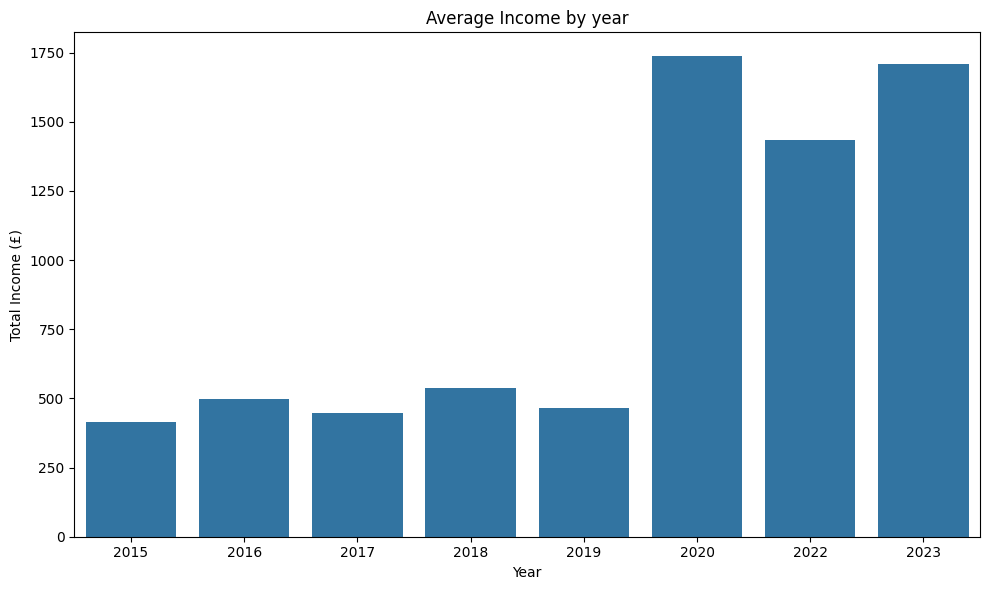

In [4]:
avg_profit_by_year = ( 
    merge_df.
    groupby('year')['Profit_per_Vehicle']
    .mean()
    .reset_index(name='average_profit')
    .sort_values(by='average_profit',ascending=False)
    )

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_profit_by_year, x='year', y='average_profit', ci=None)
plt.title("Average Income by year")
plt.ylabel("Total Income (£)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()




20-23 are the best preforming cars, so, generally newer cars gives us more profitability

In [5]:
maintenance_cost.columns
merge_vehicle_maintenance= pd.merge(vehicle_data_df,maintenance_cost,on='vehicle_id',how='left')
current_year = datetime.now().year
vehicle_data_df['vehicle_age'] = current_year - vehicle_data_df['year']

## 2.	What is the distribution of vehicle values, ages, and maintenance costs across the fleet?

In [6]:
merge_vehicle_maintenance= pd.merge(vehicle_data_df,maintenance_cost,on='vehicle_id',how='left')

merge_vehicle_maintenance['value'] = pd.to_numeric(merge_vehicle_maintenance['value'], errors='coerce')
merge_vehicle_maintenance['vehicle_age'] = pd.to_numeric(merge_vehicle_maintenance['vehicle_age'], errors='coerce')
merge_vehicle_maintenance['total_cost'] = pd.to_numeric(merge_vehicle_maintenance['total_cost'], errors='coerce')


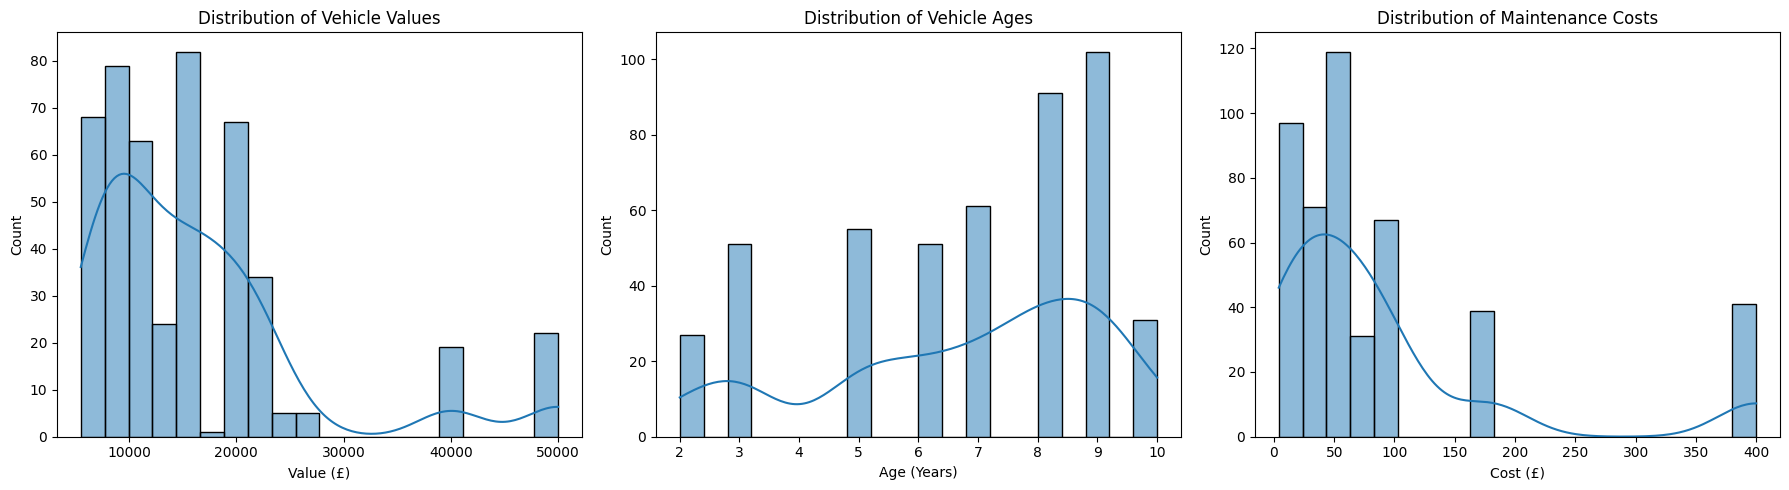

,value,vehicle_age,maintenance_cost
16,16000,8,4831.0
19,20000,3,3214.0
4,8000,9,2939.0
7,9000,9,2877.0
6,8500,8,2681.0
26,50000,2,2648.0
12,13000,7,2157.0
9,11000,6,1901.0
25,40000,3,1771.0
3,7500,9,1758.0


In [7]:


group_maintenance_cost= ( 
    merge_vehicle_maintenance
    .groupby(['value','vehicle_age',])['total_cost']
    .sum()
    .reset_index(name='maintenance_cost')
    .sort_values(by='maintenance_cost',ascending=False)
)


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Vehicle value distribution
sns.histplot(merge_vehicle_maintenance['value'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Vehicle Values')
axs[0].set_xlabel('Value (£)')

# Vehicle age distribution
sns.histplot(merge_vehicle_maintenance['vehicle_age'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Vehicle Ages')
axs[1].set_xlabel('Age (Years)')

# Maintenance cost distribution
sns.histplot(merge_vehicle_maintenance['total_cost'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Maintenance Costs')
axs[2].set_xlabel('Cost (£)')

plt.tight_layout()
plt.show()
group_maintenance_cost.head(50)




### Average Maintenance Cost

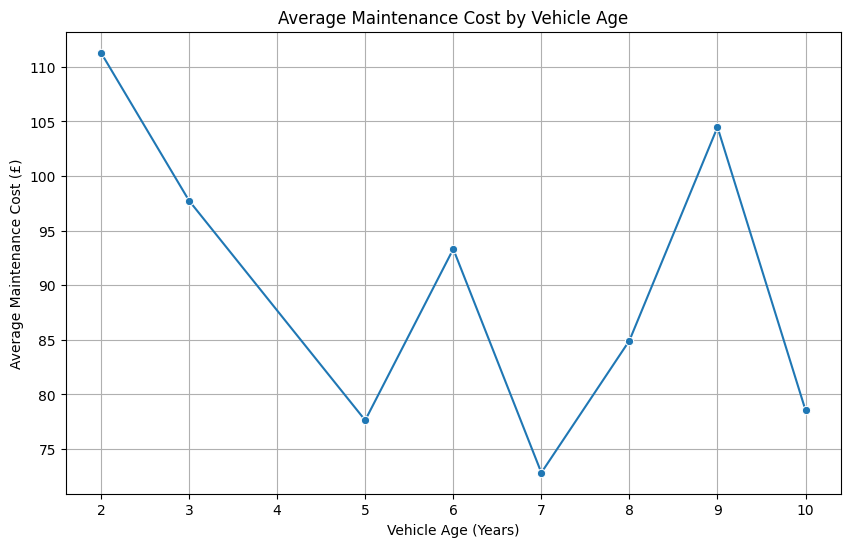

   vehicle_age  average_maintenance_cost
0            2                111.296296
1            3                 97.745098
2            5                 77.636364
3            6                 93.320000
4            7                 72.833333
5            8                 84.934066
6            9                104.480000
7           10                 78.548387


In [8]:

# Group by age and calculate average maintenance cost
average_maintenance_by_age = (
    merge_vehicle_maintenance
    .groupby('vehicle_age')['total_cost']
    .mean()
    .reset_index(name='average_maintenance_cost')
    .sort_values(by='vehicle_age', ascending=True)
)


plt.figure(figsize=(10,6))
sns.lineplot(data=average_maintenance_by_age, x='vehicle_age', y='average_maintenance_cost', marker='o')
plt.title('Average Maintenance Cost by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Average Maintenance Cost (£)')
plt.grid(True)
plt.show()

print(average_maintenance_by_age)

The average maintenance cost does not show a clear relationship with the age of the car.
One possible explanation is that newer cars, when involved in accidents, may incur higher repair costs compared to older cars.
To investigate this further, I would analyze the maintenance data by grouping it based on accident occurrences and maintenance costs to identify any correlations.

In [ ]:
maintenance_cost.columns

Index(['vehicle_id', 'item_name', 'quantity_used', 'Month', 'cost_per_unit',
       'total_cost'],
      dtype='object')

## 3.	Which vehicles rack up the most maintenance events or claim incidents?

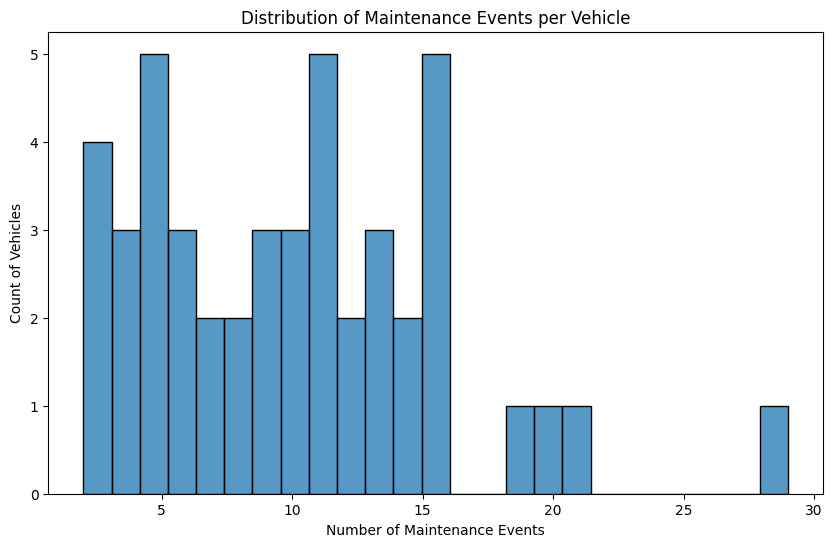

,vehicle_id,maintenance_events
40,V0045,29
0,V0001,21
16,V0020,20
14,V0018,19
20,V0024,16


In [9]:

merge_vehicle_maintenance_count= pd.merge(vehicle_data_df,maintenance_cost,on='vehicle_id',how='inner')


grouped_maintenance_count=( 
    merge_vehicle_maintenance_count
    .groupby(['vehicle_id'])['reg_plate']
    .count()
    .reset_index(name='maintenance_events')
    .sort_values(by='maintenance_events',ascending=False)
)
# Histogram of maintenance events per vehicle
plt.figure(figsize=(10,6))
sns.histplot(grouped_maintenance_count['maintenance_events'], bins=25, kde=False)
plt.title('Distribution of Maintenance Events per Vehicle')
plt.xlabel('Number of Maintenance Events')
plt.ylabel('Count of Vehicles')
plt.show()
grouped_maintenance_count.head()

In [351]:
service_type_df.columns

Index(['event_id', 'vehicle_id', 'driver_id', 'event_date', 'service_type',
       'cost', 'downtime_hours', 'claim_type', 'severity'],
      dtype='object')

## 4. What are the average and total operating costs per vehicle type and claim type  ( maintenance, accident)?
* Relevant tables: service_type, vehicles





C:\Users\yeahm\AppData\Local\Temp\ipykernel_27920\2414384718.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


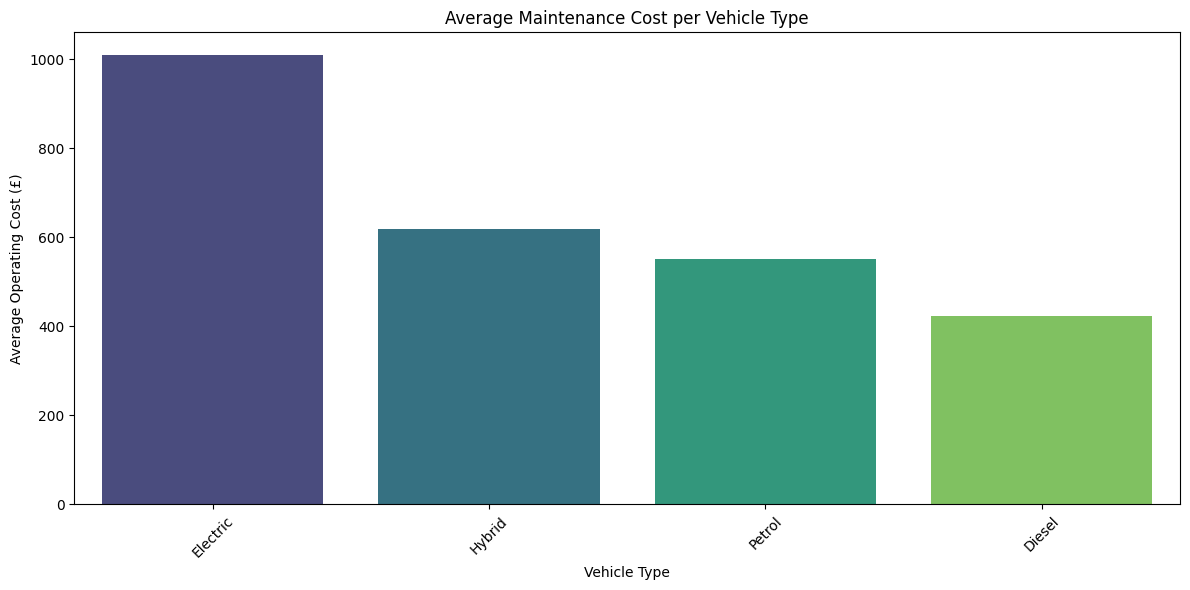

In [10]:
merge_vehicle_service= pd.merge(vehicle_data_df,service_type_df,on='vehicle_id',how='inner')

## check for maintenance only 

merge_vehicle_service = merge_vehicle_service[merge_vehicle_service['claim_type']=='Maintenance']
## average cost per claim type 
group_by_vehicle_service_mean = (
    merge_vehicle_service
    .groupby(['type','claim_type']) ['cost']
    .mean()
    .reset_index(name='average_operating_cost')
    .sort_values(by='average_operating_cost',ascending=False)
)



group_by_vehicle_service_mean.head(15)
plt.figure(figsize=(12,6))
sns.barplot(
    data=group_by_vehicle_service_mean, 
    x='type', 
    y='average_operating_cost',
    palette='viridis'
)
plt.title('Average Maintenance Cost per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Operating Cost (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\yeahm\AppData\Local\Temp\ipykernel_27920\1117019069.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


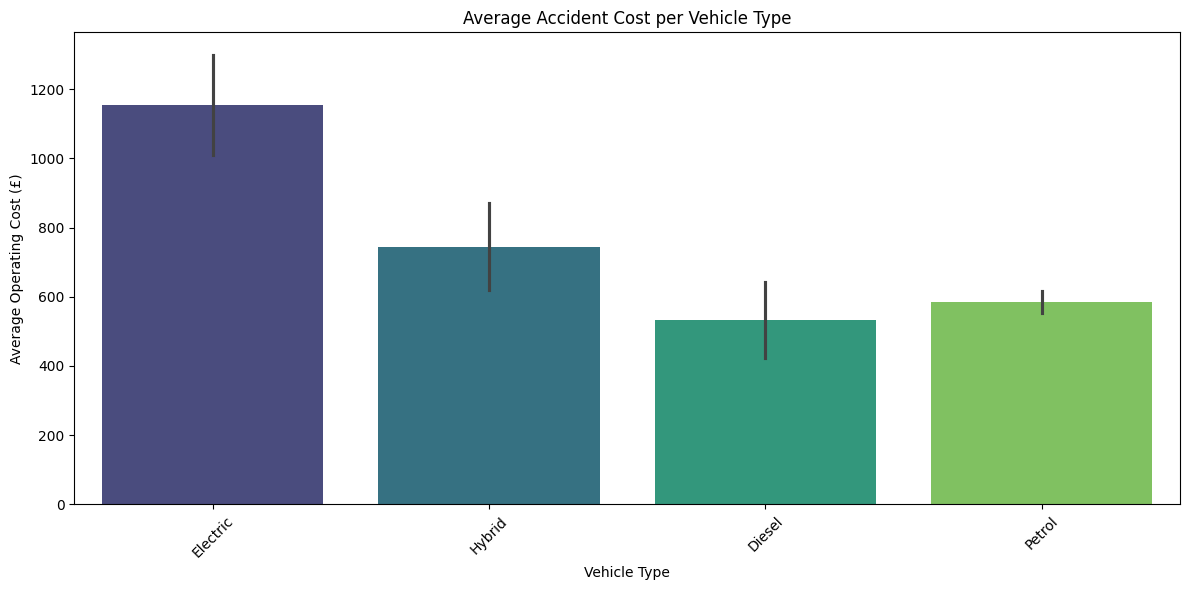

In [11]:
merge_vehicle_service_accident= pd.merge(vehicle_data_df,service_type_df,on='vehicle_id',how='inner')

merge_vehicle_service = merge_vehicle_service_accident[merge_vehicle_service_accident['claim_type']=='Accident']
## average cost per claim type 
group_by_vehicle_service_mean = (
    merge_vehicle_service_accident
    .groupby(['type','claim_type']) ['cost']
    .mean()
    .reset_index(name='average_operating_cost')
    .sort_values(by='average_operating_cost',ascending=False)
)



group_by_vehicle_service_mean.head(15)
plt.figure(figsize=(12,6))
sns.barplot(
    data=group_by_vehicle_service_mean, 
    x='type', 
    y='average_operating_cost',
    palette='viridis'
)
plt.title('Average Accident Cost per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Operating Cost (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Electric vehicles have the highest average cost per event, primarily due to the high cost of accident repairs. Accident-related expenses are consistently higher than maintenance across all vehicle types. The specialized material and component contributes to its overall cost for electric cars.

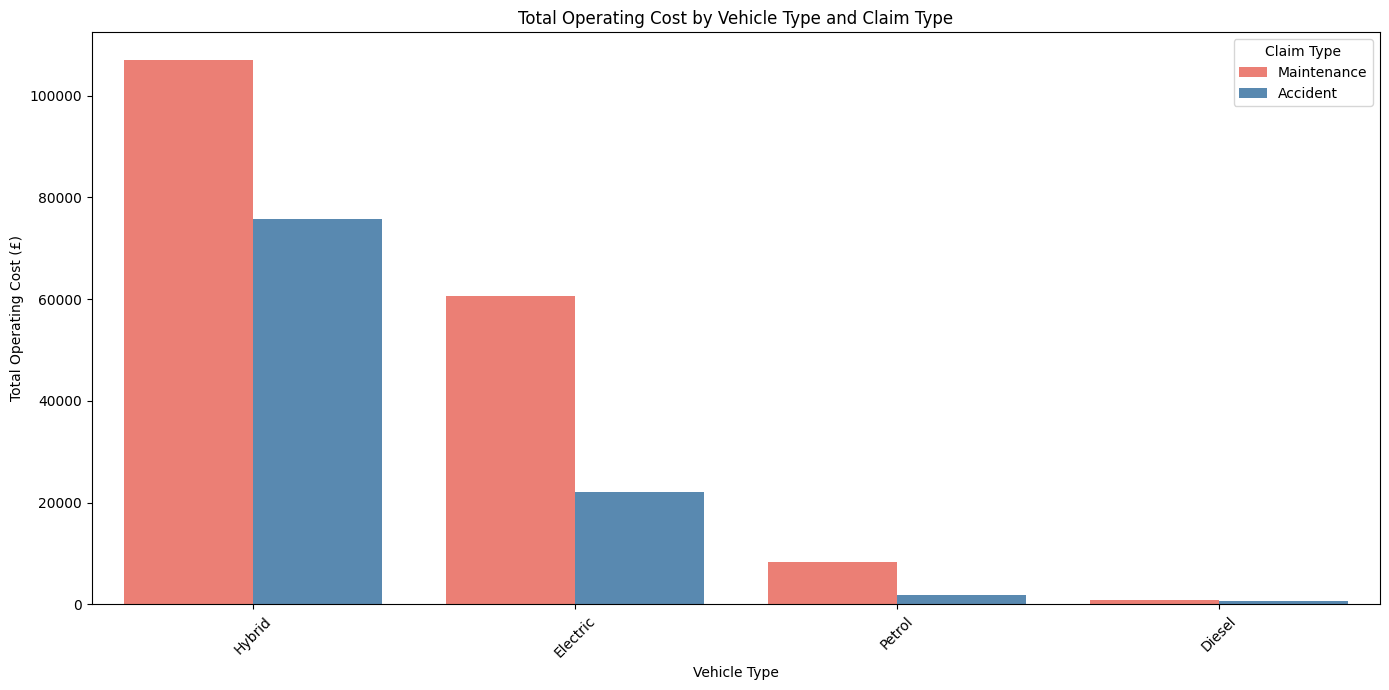

,type,claim_type,total_operating_cost
5,Hybrid,Maintenance,107073
4,Hybrid,Accident,75745
3,Electric,Maintenance,60620
2,Electric,Accident,22083
7,Petrol,Maintenance,8285
6,Petrol,Accident,1852
1,Diesel,Maintenance,845
0,Diesel,Accident,643


In [12]:
merge_vehicle_service= pd.merge(vehicle_data_df,service_type_df,on='vehicle_id',how='inner')


## total cost per claim type 
group_by_vehicle_service_sum = (
    merge_vehicle_service
    .groupby(['type','claim_type']) ['cost']
    .sum()
    .reset_index(name='total_operating_cost')
    .sort_values(by='total_operating_cost',ascending=False)
)


plt.figure(figsize=(14,7))
sns.barplot(
    data=group_by_vehicle_service_sum,
    x='type',
    y='total_operating_cost',
    hue='claim_type',
    palette=['#FF6F61', '#4B8BBE']  # Example colors for Maintenance and Accident
)
plt.title('Total Operating Cost by Vehicle Type and Claim Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Operating Cost (£)')
plt.xticks(rotation=45)
plt.legend(title='Claim Type')
plt.tight_layout()
plt.show()
group_by_vehicle_service_sum.head(15)

The data shows that petrol and diesel vehicles have the smallest gap between maintenance and accident costs. This suggests that, from a cost perspective, these fuel types are relatively balanced in their operating expenses.

Realistically, buying more petrol and diesel cars could make sense for a fleet focused on predictable and balanced maintenance and accident costs. However, in the London rental market, hybrids stand out as a cost-effective option, especially for drivers who use their vehicles for services like Uber. Hybrids often offer better fuel efficiency and lower running costs, making them attractive for high-mileage and urban driving

In [354]:
trip_logs_df.columns


Index(['trip_id', 'vehicle_id', 'driver_id', 'start_ts', 'end_ts', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'distance_miles', 'idle_time_min',
       'harsh_brake_count', 'avg_speed_mph', 'start_date', 'end_date'],
      dtype='object')

## 5. How does vehicle utilization vary by vehicle type and age (e.g., miles driven, trips assigned)?
* Relevant tables: vehicle_driver_assignments, telematics or trip logs (if available)

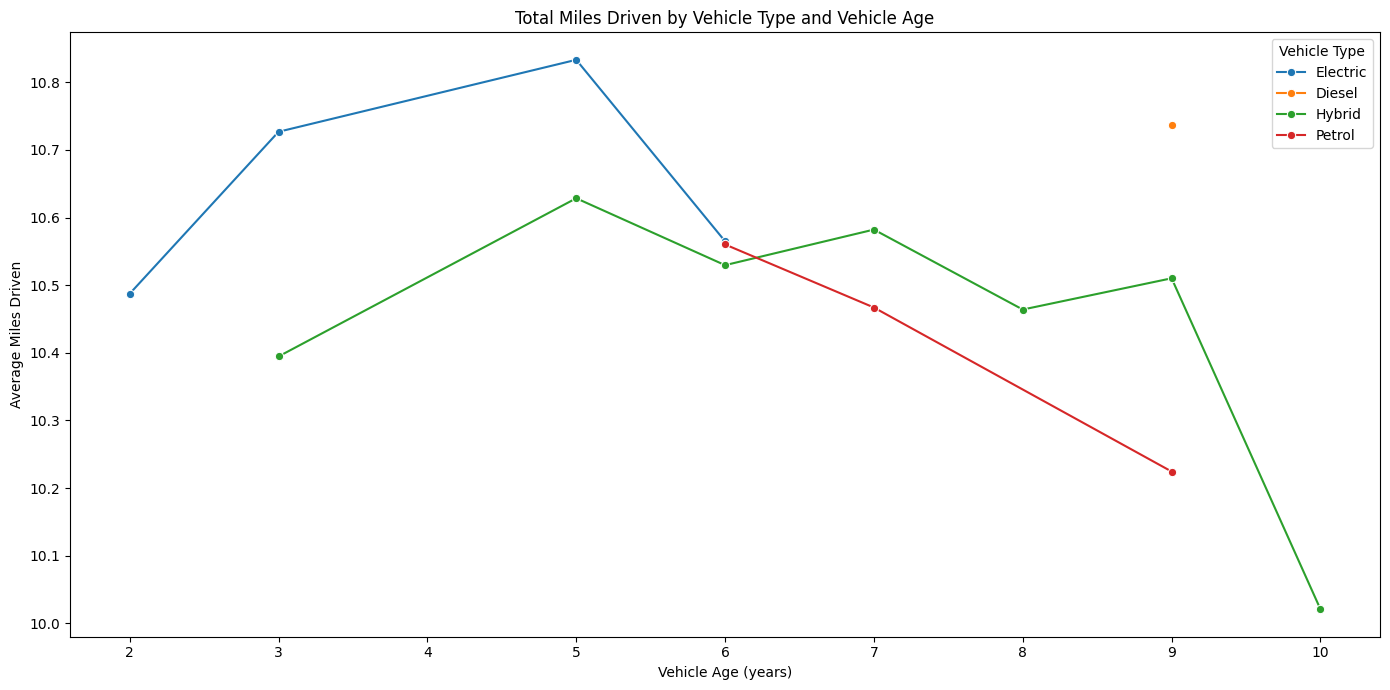

,type,vehicle_age,miles_driven
3,Electric,5,10.833266
0,Diesel,9,10.736922
2,Electric,3,10.726832
6,Hybrid,5,10.628509
8,Hybrid,7,10.582181
4,Electric,6,10.564903
12,Petrol,6,10.560169
7,Hybrid,6,10.529550
10,Hybrid,9,10.510162
1,Electric,2,10.487319


In [13]:
merged_vehicle_trip_log = pd.merge(vehicle_data_df,trip_logs_df,on='vehicle_id',how='inner')

group_by_vehicle_trip_log = (
    merged_vehicle_trip_log
    .groupby(['type','vehicle_age'])['distance_miles']
    .mean()
    .reset_index(name='miles_driven')
    .sort_values(by='miles_driven',ascending=False)
)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=group_by_vehicle_trip_log,
    x='vehicle_age',
    y='miles_driven',
    hue='type',
    marker='o'
)
plt.title('Total Miles Driven by Vehicle Type and Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Average Miles Driven')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

group_by_vehicle_trip_log.head(15)

Th graph shows hybrid vehicles maintain  the most steady average miles even as they age  this suggests reliability ,fewer breakdowns = more consistent usage. But we will have to compare based on cost of maintenance and and income per vehicle based on the amount of contracts we get to know whether we should invest in more hybrids. 

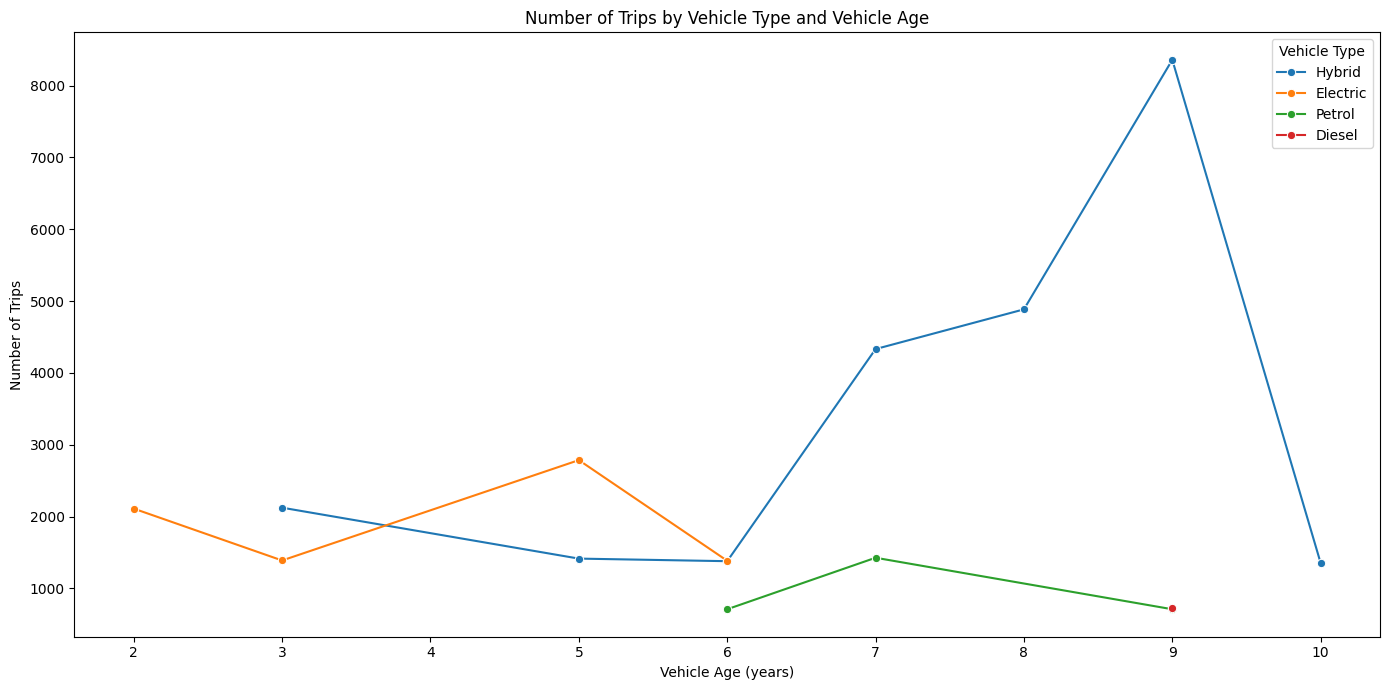

,type,vehicle_age,amount_of_trips
10,Hybrid,9,8359
9,Hybrid,8,4885
8,Hybrid,7,4332
3,Electric,5,2786
5,Hybrid,3,2124
1,Electric,2,2111
13,Petrol,7,1427
6,Hybrid,5,1415
2,Electric,3,1389
4,Electric,6,1385


In [15]:
merged_vehicle_trip_log = pd.merge(vehicle_data_df,trip_logs_df,on='vehicle_id',how='inner')

group_by_vehicle_trip_log_count = (
    merged_vehicle_trip_log
    .groupby(['type','vehicle_age'])['trip_id']
    .count()
    .reset_index(name='amount_of_trips')
    .sort_values(by='amount_of_trips',ascending=False)
)

plt.figure(figsize=(14,7))
sns.lineplot(
    data=group_by_vehicle_trip_log_count,
    x='vehicle_age',
    y='amount_of_trips',
    hue='type',
    marker='o'
)
plt.title('Number of Trips by Vehicle Type and Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Number of Trips')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

group_by_vehicle_trip_log_count.head(100)

Trip volumes vary more strongly with vehicle age for Hybrids and Petrol vehicles, which likely reflects increased breakdowns and maintenance needs in older vehicles. In contrast, EVs maintain generally lower but more stable trip counts across ages, possibly due to better reliability or fleet management practices. These patterns may be driven by fleet composition, vehicle availability, and maintenance schedules rather than explicit dispatch strategies.

In [17]:
merge_vehicle_service.head()

,vehicle_id,make,model,year,type,mileage_start,reg_plate,value,vehicle_age_x,event_id,driver_id,event_date,service_type,cost,downtime_hours,claim_type,severity,vehicle_age_y
0,V0001,Fiat,500 Hybrid,2017,Hybrid,67440,KT44 DMM,8500,8,E000007,D0001,2025-01-08,Bumper Replacement,751,3.8,Maintenance,Medium,8
1,V0001,Fiat,500 Hybrid,2017,Hybrid,67440,KT44 DMM,8500,8,E000015,D0001,2025-01-16,Suspension Align,423,2.3,Maintenance,Low,8
2,V0001,Fiat,500 Hybrid,2017,Hybrid,67440,KT44 DMM,8500,8,E000019,D0001,2025-01-20,Bumper Replacement,759,4.1,Maintenance,Medium,8
3,V0001,Fiat,500 Hybrid,2017,Hybrid,67440,KT44 DMM,8500,8,E000030,D0001,2025-01-31,Bodywork Repair,1273,7.3,Accident,High,8
4,V0001,Fiat,500 Hybrid,2017,Hybrid,67440,KT44 DMM,8500,8,E000050,D0001,2025-02-20,Sensor Calibration,656,2.6,Maintenance,Low,8


## 6. What is the breakdown of claim incidents by vehicle type and age?
* Relevant tables: service_type, vehicles

In [21]:
merge_vehicle_service.columns

merge_vehicle_service['vehicle_age']=merge_vehicle_service['vehicle_age_y']

merge_vehicle_service.drop(columns=['vehicle_age_y','vehicle_age_x'],inplace=True)

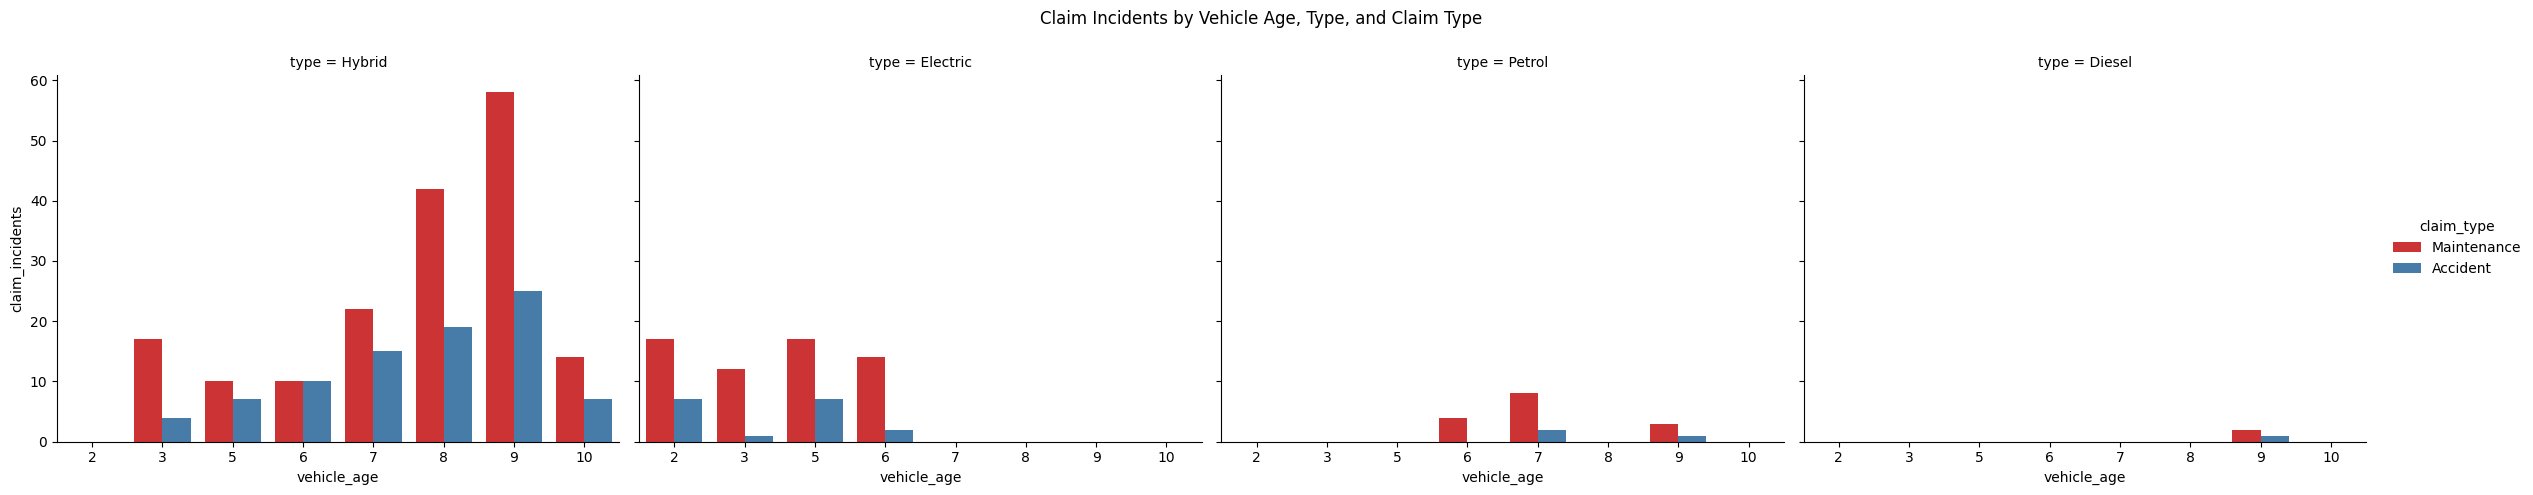

,type,vehicle_age,claim_type,claim_incidents
21,Hybrid,9,Maintenance,58
19,Hybrid,8,Maintenance,42
20,Hybrid,9,Accident,25
17,Hybrid,7,Maintenance,22
18,Hybrid,8,Accident,19
11,Hybrid,3,Maintenance,17
7,Electric,5,Maintenance,17
3,Electric,2,Maintenance,17
16,Hybrid,7,Accident,15
9,Electric,6,Maintenance,14


In [22]:
merge_vehicle_service.head()

group_vehicle_service_type_age= (
    merge_vehicle_service
    .groupby(['type','vehicle_age','claim_type'])['event_id']
    .count()
    .reset_index(name='claim_incidents')
    .sort_values(by='claim_incidents',ascending=False)

)

sns.catplot(
    data=group_vehicle_service_type_age,
    x='vehicle_age',
    y='claim_incidents',
    hue='claim_type',
    col='type',
    kind='bar',
    height=5,
    aspect=1.2,
    palette='Set1'
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Claim Incidents by Vehicle Age, Type, and Claim Type')
plt.show()

group_vehicle_service_type_age.head(50)

Average Claim Per Vehicle

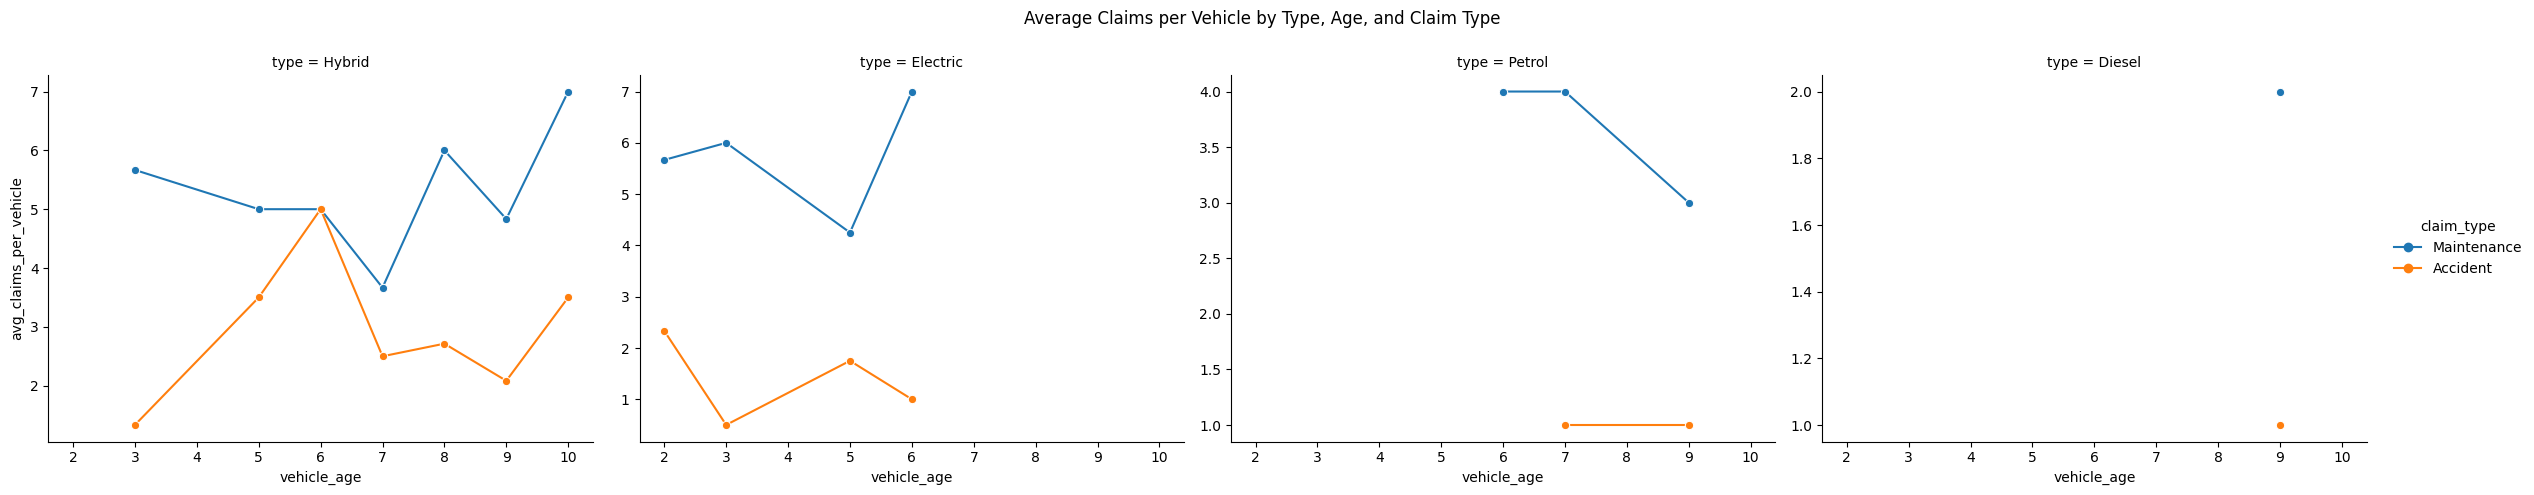

,type,vehicle_age,claim_type,claim_incidents,vehicle_count,avg_claims_per_vehicle
10,Hybrid,10,Maintenance,14,2,7.000000
9,Electric,6,Maintenance,14,2,7.000000
11,Electric,3,Maintenance,12,2,6.000000
1,Hybrid,8,Maintenance,42,7,6.000000
5,Hybrid,3,Maintenance,17,3,5.666667
7,Electric,2,Maintenance,17,3,5.666667
12,Hybrid,6,Maintenance,10,2,5.000000
14,Hybrid,5,Maintenance,10,2,5.000000
13,Hybrid,6,Accident,10,2,5.000000
0,Hybrid,9,Maintenance,58,12,4.833333


In [23]:
vehicle_counts = (
    vehicle_data_df
    .groupby(['type', 'vehicle_age'])['vehicle_id']
    .count()
    .reset_index(name='vehicle_count')
    
)
avg_claims_df = (
    group_vehicle_service_type_age
    .merge(vehicle_counts, on=['type', 'vehicle_age'], how='left')
)


avg_claims_df['avg_claims_per_vehicle'] = (
    avg_claims_df['claim_incidents'] / avg_claims_df['vehicle_count']
)


avg_claims_df= avg_claims_df.sort_values(by='avg_claims_per_vehicle',ascending=False)




sns.relplot(
    data=avg_claims_df,
    x='vehicle_age',
    y='avg_claims_per_vehicle',
    hue='claim_type',
    col='type',
    kind='line',
    marker='o',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Average Claims per Vehicle by Type, Age, and Claim Type')
plt.show()
avg_claims_df.head(100)


Maintenance claim frequency for hybrids and electric vehicles remains consistently high across different vehicle ages, indicating regular servicing needs. likely due to their specific technology and maintenance schedules.

Accident claim frequency varies without a clear pattern related to vehicle age or type.

In [360]:
vehicle_driver_df.columns

Index(['assignment_id', 'vehicle_id', 'driver_id', 'contract_start',
       'contract_end'],
      dtype='object')

## 7. What is the average downtime per vehicle due to maintenance or repairs?
* Relevant tables: service_type, vehicle_driver_assignments (to estimate impact on availability)

C:\Users\yeahm\AppData\Local\Temp\ipykernel_27920\1419158336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


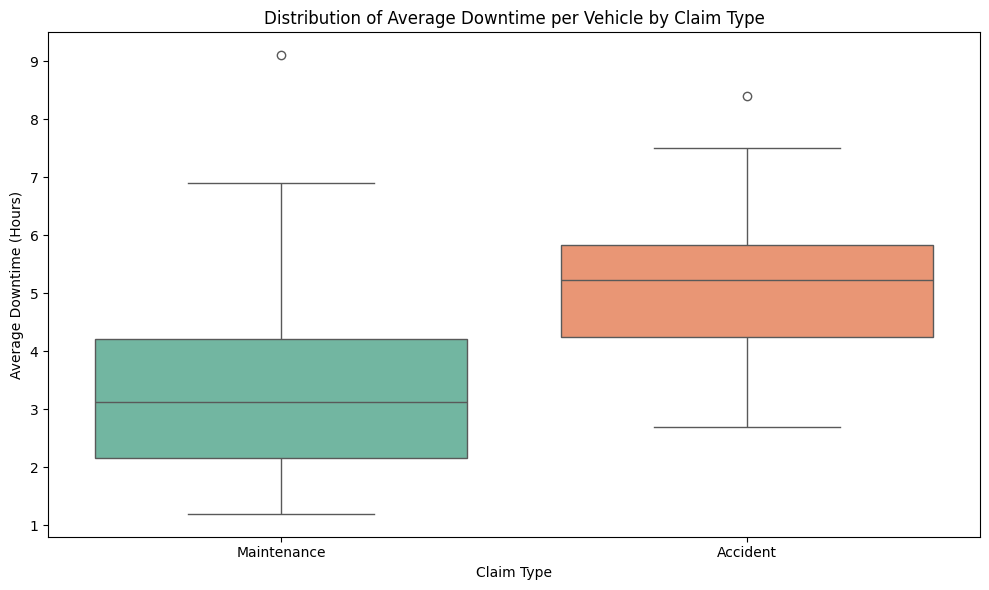

,vehicle_id,claim_type,average_downtime_per_vehicle
77,V0041,Maintenance,9.100000
29,V0017,Accident,8.400000
49,V0027,Accident,7.500000
33,V0019,Accident,7.300000
5,V0004,Accident,7.200000
45,V0025,Accident,7.150000
26,V0015,Accident,6.900000
87,V0046,Maintenance,6.900000
7,V0005,Accident,6.600000
38,V0021,Maintenance,6.175000


In [24]:
merge_service_vehicle_driver= pd.merge(vehicle_driver_df,service_type_df,on='vehicle_id',how='inner')


## group by average downtime hours 
group_by_downtime_hours= (
    merge_service_vehicle_driver
    .groupby(['vehicle_id','claim_type'])['downtime_hours']
    .mean()
    .reset_index(name='average_downtime_per_vehicle')
    .sort_values(by='average_downtime_per_vehicle',ascending=False)
    )


plt.figure(figsize=(10,6))
sns.boxplot(
    data=group_by_downtime_hours,
    x='claim_type',
    y='average_downtime_per_vehicle',
    palette='Set2'
)
plt.title('Distribution of Average Downtime per Vehicle by Claim Type')
plt.xlabel('Claim Type')
plt.ylabel('Average Downtime (Hours)')
plt.tight_layout()
plt.show()

group_by_downtime_hours.head(15)



The average downtime per vehicle ranges from approximately 5.8 to 8.4 hours, with accident-related claims accounting for a significant share of vehicle unavailability. To address this, we need to identify the main contributors to accident-related claims. A correlation analysis with driver and vehicle attributes will help uncover potential risk factors.

In [452]:
profit_vehicles_df.columns

Index(['Month', 'vehicle_id', 'Vehicle_Income', 'Maintenance_Cost',
       'Profit_per_Vehicle'],
      dtype='object')

## 8. How do income and expenses trend over months across the fleet?
* Relevant tables: profit_per_vehicle table (by month), vehicles

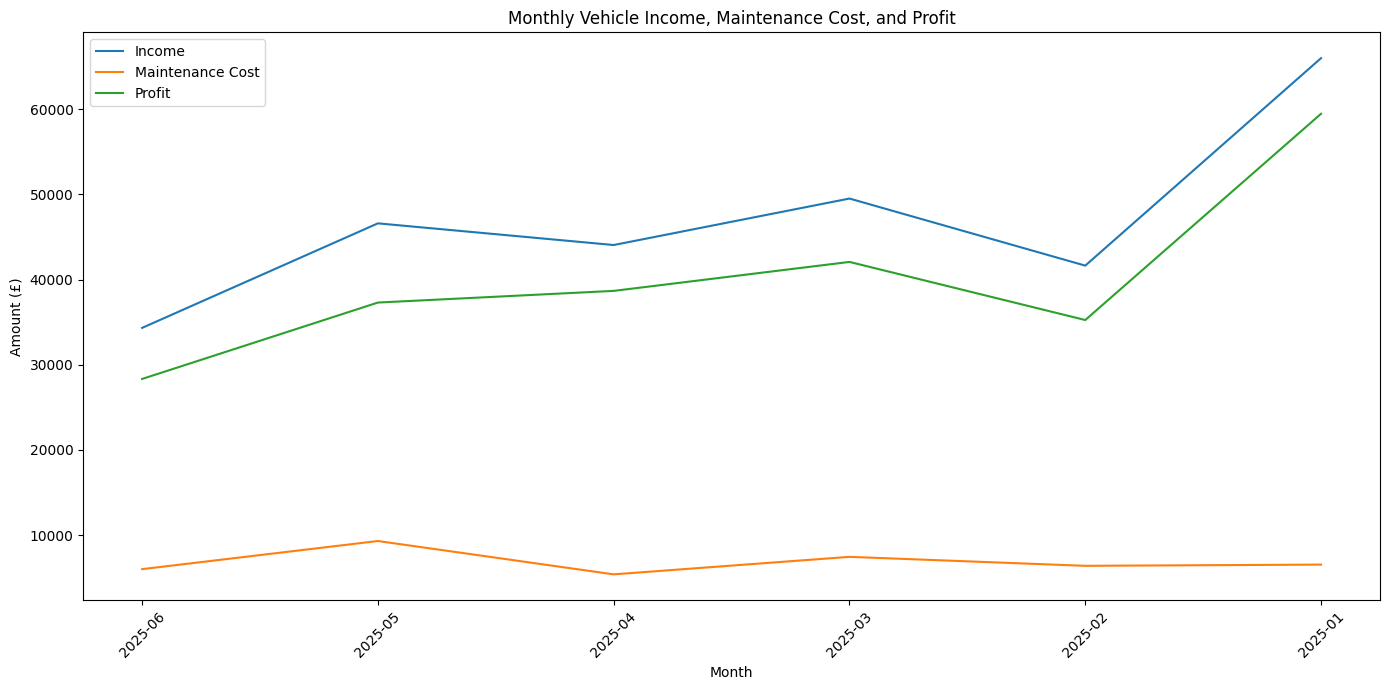

,Month,Vehicle_Income,Maintenance_Cost,Profit_per_Vehicle
5,2025-06,34333.0,5999.0,28334.0
4,2025-05,46609.0,9302.0,37307.0
3,2025-04,44064.0,5387.0,38677.0
2,2025-03,49522.0,7443.0,42079.0
1,2025-02,41644.0,6389.0,35255.0
0,2025-01,66011.0,6532.0,59479.0


In [25]:
merge_profit_vehicle = pd.merge(profit_vehicles_df,vehicle_data_df,on='vehicle_id',how='inner')

## Group by income and expense per vehicle over months 
group_by_income_expense= (
    merge_profit_vehicle
    .groupby(['Month'])[['Vehicle_Income','Maintenance_Cost','Profit_per_Vehicle']]
    .sum()
    .reset_index()
    .sort_values(by='Month',ascending=False)
)
plt.figure(figsize=(14,7))

plt.plot(group_by_income_expense['Month'], group_by_income_expense['Vehicle_Income'], label='Income')
plt.plot(group_by_income_expense['Month'], group_by_income_expense['Maintenance_Cost'], label='Maintenance Cost')
plt.plot(group_by_income_expense['Month'], group_by_income_expense['Profit_per_Vehicle'], label='Profit')

plt.title('Monthly Vehicle Income, Maintenance Cost, and Profit')
plt.xlabel('Month')
plt.ylabel('Amount (£)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
group_by_income_expense.head(150)

Over the 6-month period, maintenance costs remain relatively stable, showing a smooth trend without major fluctuations. This suggests that maintenance is not the primary driver of overall expense volatility.

In contrast, both vehicle income and profit per vehicle show a clear downward trend from January to July, indicating declining performance or demand. This points to potential issues on the revenue side, rather than operational cost increases.

#### - 8.1 Which vehicle had the lowest profit overall during the six months?

In [26]:
group_by_lowest_profit=(
    merge_profit_vehicle
    .groupby(['vehicle_id','make','type','vehicle_age'])['Profit_per_Vehicle']
    .sum()
    .reset_index(name='Profit')
    .sort_values(by='Profit',ascending=True)
)


group_by_lowest_profit.head(1)

,vehicle_id,make,type,vehicle_age,Profit
44,V0045,Seat,Hybrid,8,951.0


Vehicle V00045, a 8-year-old Seat, recorded the lowest total profit  just £951 over six months. Given the business is currently operating near break-even, it's worth investigating whether older vehicles are contributing to reduced profitability.

Possible contributing factors include:

Higher maintenance costs typically associated with older cars.

Lower monthly rental income if the vehicle is under a discounted or legacy pricing model.

While this doesn’t confirm causality, it suggests that rotating out older vehicles or re-evaluating their rental terms may be a viable strategy to improve fleet profitability. A broader analysis of vehicle age vs. profit would help validate this.

In [307]:
driver_data_df.columns

Index(['driver_id', 'name', 'age', 'licence_year', 'ratings'], dtype='object')

## 9. Which drivers are linked to the highest total accident-related costs?
* Relevant tables:driver_data,service_type (filter by claim_type == 'Accident') vehicle_driver_assignments drivers_data

In [27]:
accidents_df = service_type_df[service_type_df['claim_type'] == 'Accident']

merged = pd.merge(accidents_df, vehicle_driver_df, on='vehicle_id', how='left')

## filter rows ehere the event_data fails withing the drivers contract period 
filtered = merged[(merged['event_date'] >= merged['contract_start']) & (merged['event_date'] <= merged['contract_end'])]


filtered.columns
filtered['driver_id']= filtered['driver_id_y']
filtered = filtered.drop(columns=['driver_id_x','driver_id_y'])
## merge with driver details 
result = pd.merge(filtered, driver_data_df, on='driver_id', how='left')


accident_costs_per_driver = (
    result.groupby(['driver_id','name','age'])['cost']
    .sum()
    .reset_index()
    .sort_values(by='cost', ascending=False)
)
accident_costs_per_driver.head(5)



C:\Users\yeahm\AppData\Local\Temp\ipykernel_27920\2968993045.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['driver_id']= filtered['driver_id_y']


,driver_id,name,age,cost
14,D0018,Bakhshi Mody,37,5911
28,D0033,Gregory Oliver,46,4942
21,D0025,Anthony Rich,32,4550
40,D0045,Anthony Deep,39,4066
42,D0048,Faraj Bedi,26,3984


The top five drivers accounted for a disproportionately high share of total accident-related costs. While this does not automatically imply driver fault, it may be valuable to review their incident history, driving conditions, and total exposure (e.g., mileage, shifts).
Further analysis combining accident frequency, distance driven, and fault attribution could help assess whether intervention, retraining.

## 10. Which drivers are involved in the most accident events (regardless of cost)?
* Relevant tables: service_type (claim_type == 'Accident'), vehicle_driver_assignments ,drivers_data

In [28]:


result.columns

group_by_accident_events=(
    result
    .groupby(['driver_id','vehicle_id','name','age'])['event_id']
    .count()
    .reset_index(name='event_count')
    .sort_values(by='event_count',ascending=False)
)


group_by_accident_events.head(20)


,driver_id,vehicle_id,name,age,event_count
14,D0018,V0018,Bakhshi Mody,37,7
40,D0045,V0045,Anthony Deep,39,5
42,D0048,V0048,Faraj Bedi,26,5
37,D0042,V0042,Vincent Pandit,35,5
7,D0010,V0010,Jonathon Roberts,26,4
39,D0044,V0044,Jerry Moore,42,4
36,D0041,V0041,Tejas Memon,48,4
21,D0025,V0025,Anthony Rich,32,4
31,D0036,V0036,Max Varughese,28,4
8,D0011,V0011,Nicholas Ryan,40,3


Several drivers show both high accident frequency and high associated costs, particularly Bakhshi Mody, Anthony depp Faraj Bedi, and Vencent Pandit, each with 5 or more reported incidents.

A next step would be to normalize accident frequency and cost by total distance driven or trip count per driver to identify risk-adjusted outliers. Drivers who remain high after this adjustment may warrant retraining or route review.

In [29]:
result.columns

merge_driver_trip_log= pd.merge(trip_logs_df,driver_data_df, on='driver_id' ,how='inner')

merge_driver_trip_log.columns

## First aggregate trip count based on driver_id 
group_by_trip_count=(
    merge_driver_trip_log
    .groupby(['driver_id'])['trip_id']
    .count()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count',ascending=False)
)

## next aggregate by total milage 
group_by_total_mileage=(
    merge_driver_trip_log
    .groupby(['driver_id'])['distance_miles']
    .sum()
    .reset_index(name='total_mileage')
    .sort_values(by='total_mileage',ascending=False)
)

group_by_trip_count.head()
group_by_total_mileage.head()

result = result.merge(group_by_trip_count, on='driver_id', how='left')
result = result.merge(group_by_total_mileage, on='driver_id', how='left')


In [433]:
merge_driver_trip_log.columns

Index(['trip_id', 'vehicle_id', 'driver_id', 'start_ts', 'end_ts', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'distance_miles', 'idle_time_min',
       'harsh_brake_count', 'avg_speed_mph', 'start_date', 'end_date', 'name',
       'age', 'licence_year', 'ratings'],
      dtype='object')

## 11. Are certain driver attributes (e.g., age, rating, experience) correlated with higher accident frequency or cost?
* Relevant tables:drivers_data, service_type (claim_type == 'Accident' with driver_id),vehicle_driver_assignments

In [30]:
result.columns

result['contract_end'] = pd.to_datetime(result['contract_end'],errors='coerce')

result['contract_start'] = pd.to_datetime(result['contract_start'],errors='coerce')
result['contract_days']= (result['contract_end']-result['contract_start']).dt.days
#compute experience
result['experience']=(
    result['contract_days'].fillna(0)*0.5+
    result['trip_count'].fillna(0)*1+
    result['total_mileage'].fillna(0)*0.01
)






In [31]:
## accident frequency per driver 
# Accident frequency per driver
accident_freq = result.groupby('driver_id').size().reset_index(name='accident_frequency')

## Accident  cost per driver 
accident_cost = result.groupby('driver_id')['cost'].sum().reset_index(name='accident_cost')

accident_freq.head()
accident_cost.head()

,driver_id,accident_cost
0,D0001,2741
1,D0003,592
2,D0004,1175
3,D0005,1913
4,D0007,561


In [460]:
## Merge them 

## select driver attributes 1 row per driver 
drivers = result[['driver_id','age','ratings','experience']].drop_duplicates()


## merge accident frequency and cost 

driver_accident_stats = drivers.merge(accident_freq,on='driver_id',how='left').merge(accident_cost,on='driver_id',how='left')


# Fill NaN (drivers with zero accidents)
driver_accident_stats['accident_frequency'] = driver_accident_stats['accident_frequency'].fillna(0)
driver_accident_stats['accident_cost'] = driver_accident_stats['accident_cost'].fillna(0)


## Calculate correlations 

correlations = driver_accident_stats[['age','ratings','experience','accident_frequency','accident_cost']].corr()


correlations.head()



,age,ratings,experience,accident_frequency,accident_cost
age,1.000000,-0.210991,0.176141,-0.166146,-0.260206
ratings,-0.210991,1.000000,0.289883,-0.350980,-0.319363
experience,0.176141,0.289883,1.000000,-0.460349,-0.438323
accident_frequency,-0.166146,-0.350980,-0.460349,1.000000,0.889414
accident_cost,-0.260206,-0.319363,-0.438323,0.889414,1.000000
